# Study Case Astra Credit Score
## Febi Andika Dani Fajar Suryawan



Diberikan data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).
Akan diprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

## Preparasi Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Input dataset training untuk membangun model
df= pd.read_csv('training.csv')
df.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [92]:
# Mengecek ukuran data
df.shape

(16625, 15)

In [3]:
# Mengecek informasi dari setiap kolom data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


In [4]:
# Mengecek apakah ada missing values dari data tiap kolom
df.isnull().sum()

ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
TARGET       0
dtype: int64

In [5]:
# Mengecek banyaknya nilai yang unik dalam tiap kolom
df.nunique()

ID           16625
LIMIT_BAL       76
MARRIAGE         3
EDUCATION        4
SEX              2
AGE             52
PAY_1            5
PAY_2            5
PAY_3            5
BILL_AMT1    13364
BILL_AMT2    13201
BILL_AMT3    12939
PAY_AMT1      5138
PAY_AMT2      5039
PAY_AMT3      4892
TARGET           2
dtype: int64

In [6]:
# Memisahkan kolom berdasarkan jenisnya
numer=['AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3']
categ=['EDUCATION','MARRIAGE','SEX','PAY_1','PAY_2','PAY_3']

## Visualisasi Data

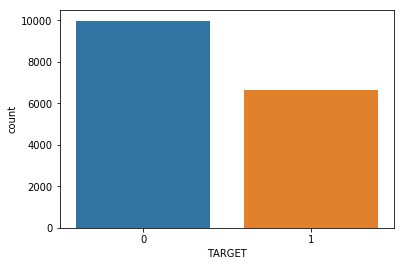

In [7]:
# Mengecek banyaknya pembayaran yang terlambat (1) dan yang tidak terlambat (0) pada kolom target
sns.countplot(df['TARGET'])

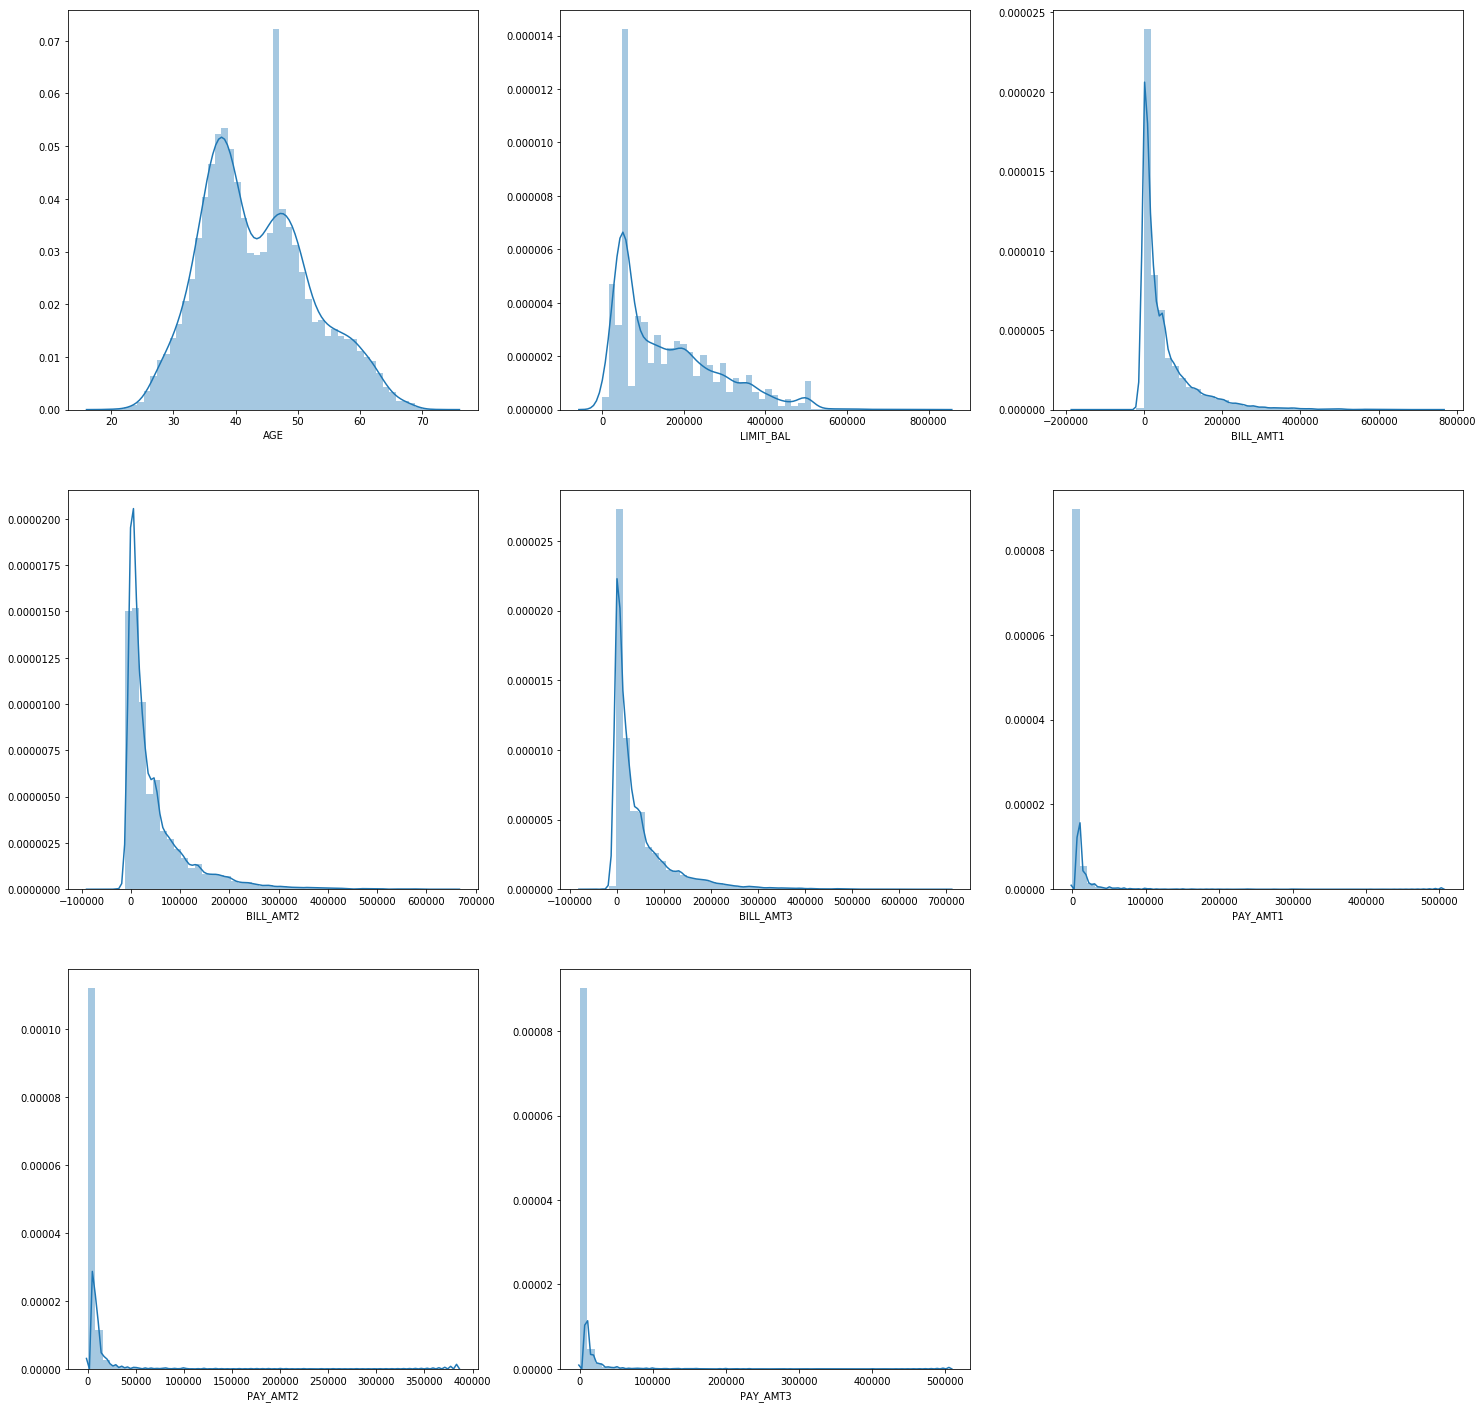

In [8]:
# Melihat distribusi dari tiap kolom yang bertipe numerik
f = plt.figure(figsize=(25,25))
for i in range(8):
    f.add_subplot(3, 3, i+1)
    sns.distplot(df[numer[i]])
plt.show()

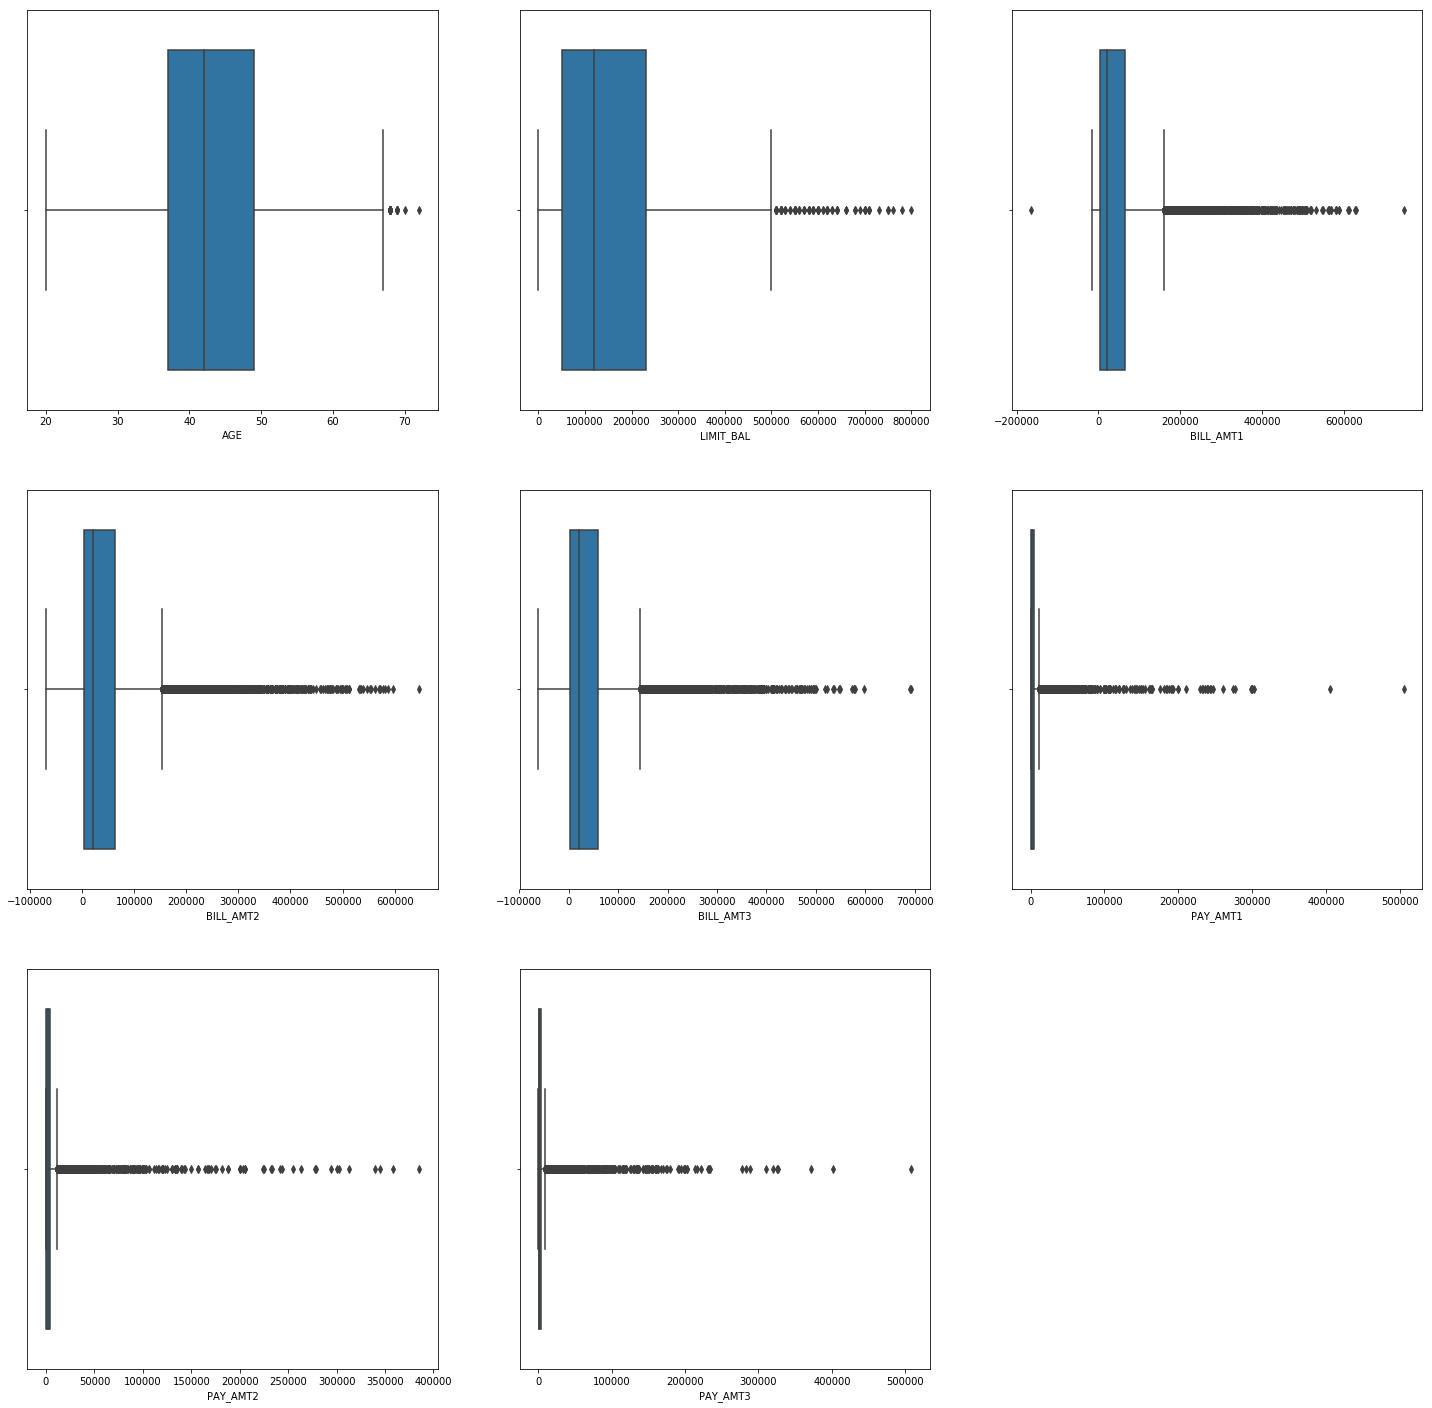

In [91]:
# Mengecek apakah ada pencilan pada data tiap kolom. Dapat dilihat bahwa terdapat pencilan untuk setiap kolom.
f = plt.figure(figsize=(25,25))
for i in range(8):
    f.add_subplot(3, 3, i+1)
    sns.boxplot(df[numer[i]])
plt.show()

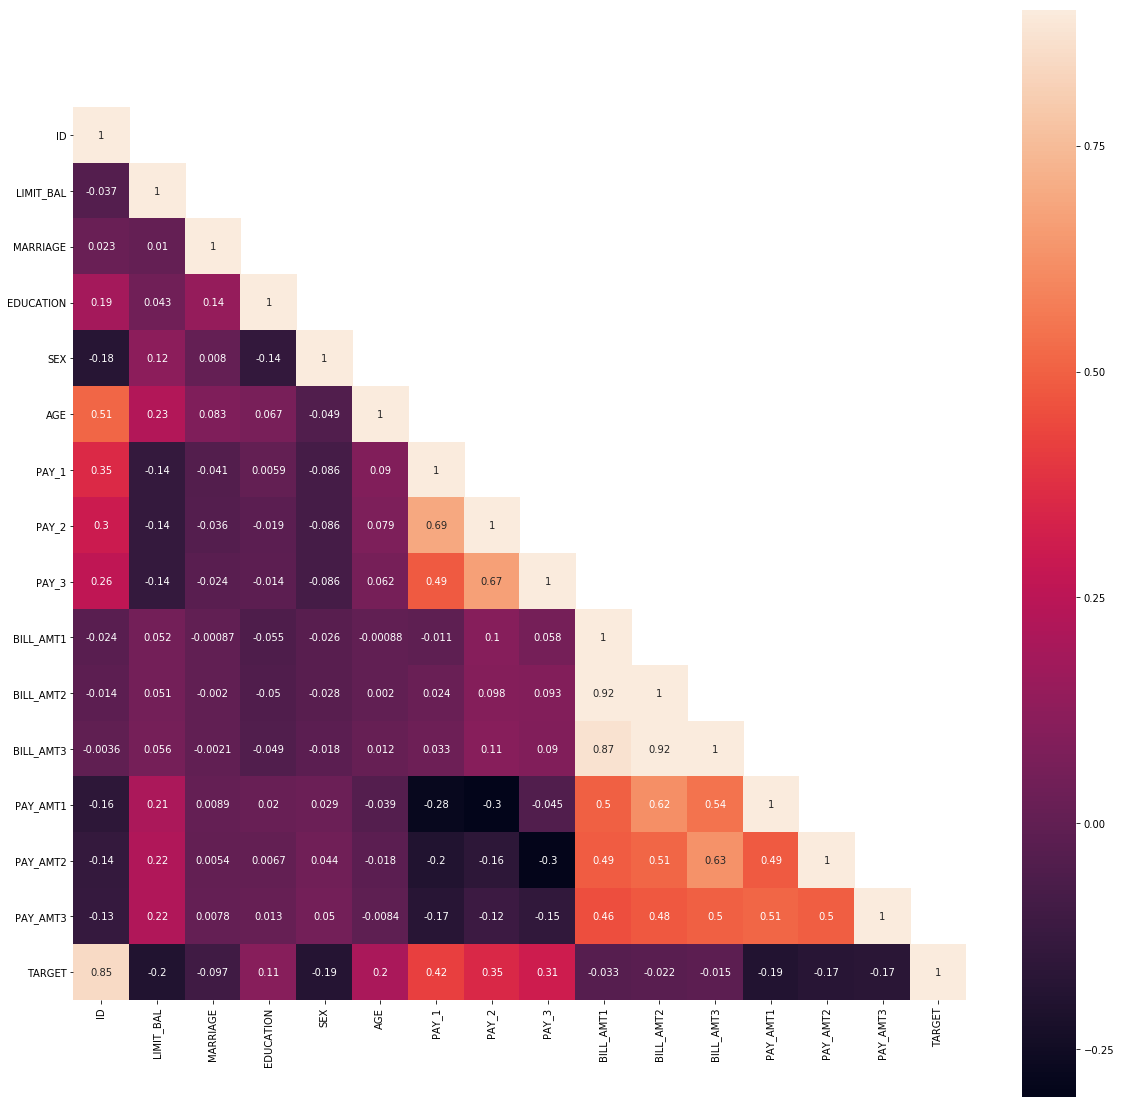

In [9]:
# Membuat korelasi dengan heatmap

# Membuat korelasi
corr = df.corr(method = 'spearman')

# Mengkonversi korelasi menjadi numpy array
mask = np.array(corr)

# Menyembunyikan nilai yang sama untuk tiap pasangan
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,20))
fig.set_size_inches(20,20)
sns.heatmap(corr,mask=mask, vmax = 0.9, square = True, annot = True)

In [10]:
# Membuang kolom ID
df=df.drop('ID',axis=1)

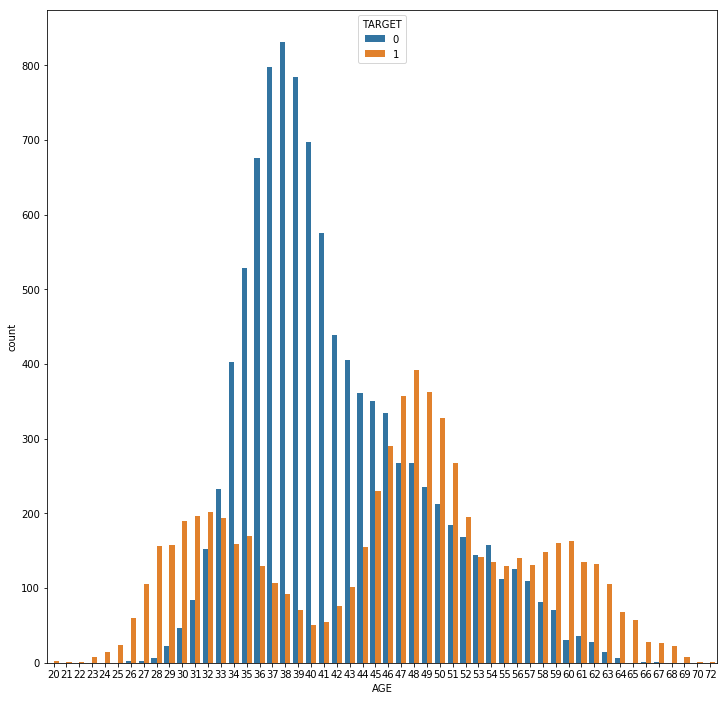

In [11]:
# Membuat plot banyaknya pembayaran terlambat dan tidak terlambat berdasarkan umur
plt.figure(figsize=(12,12))
sns.countplot(x=df['AGE'],hue=df['TARGET'])

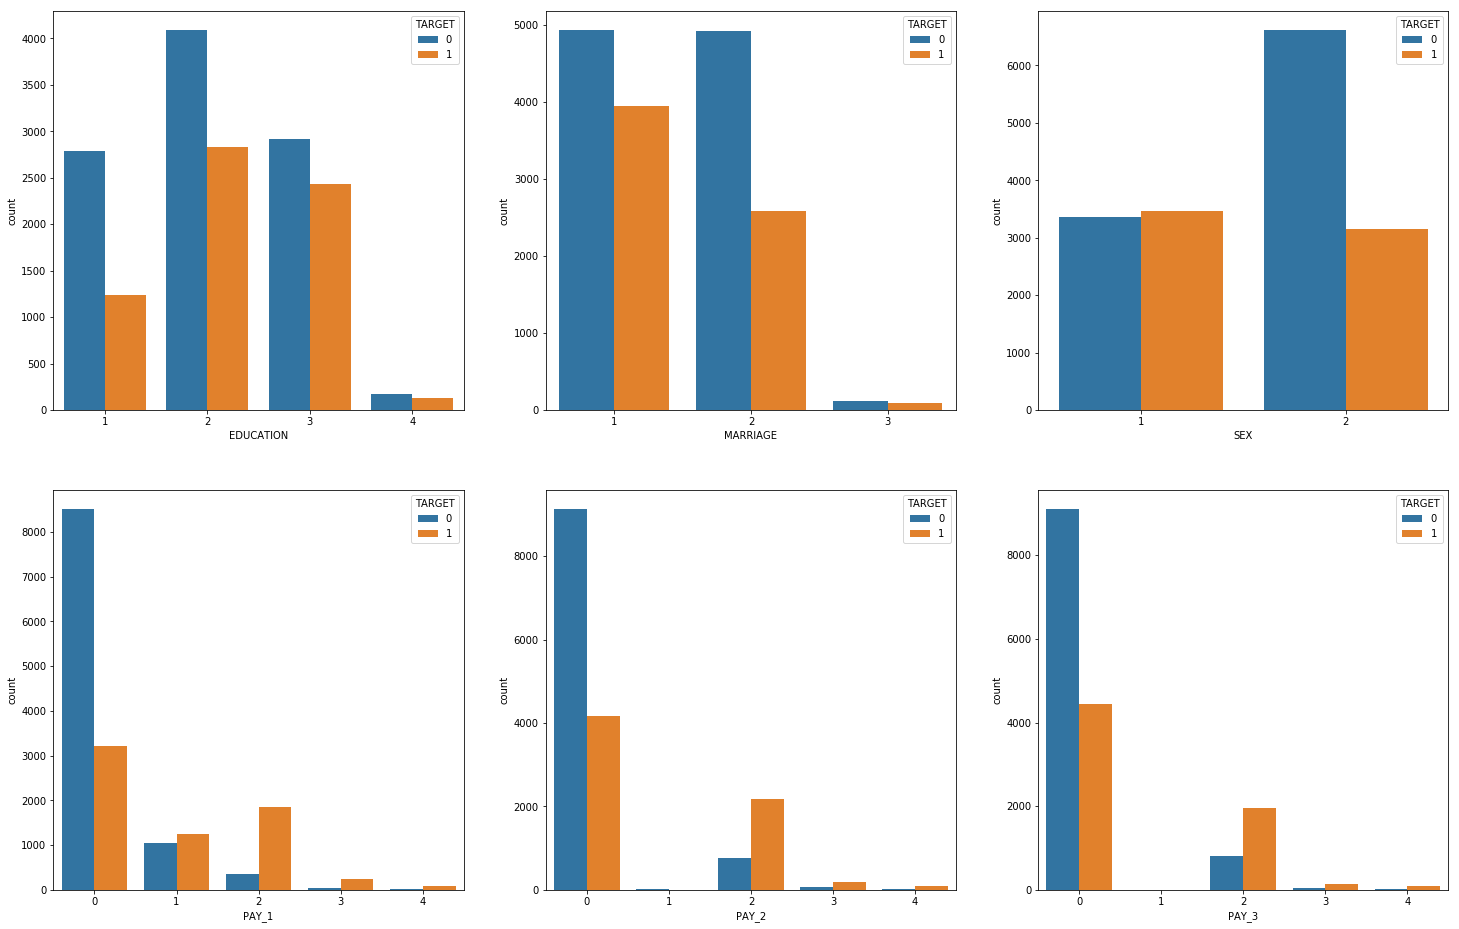

In [12]:
# Membuat plot banyaknya pembayaran terlambat dan tidak terlambat berdasarkan pendidikan, status pernikahan, jenis kelamin, lama keterlambatan pembayaran pada bulan 1,2,3
f = plt.figure(figsize=(25,25))
for i in range(6):
    f.add_subplot(3, 3, i+1)
    sns.countplot(x=df[categ[i]],hue=df['TARGET'])
plt.show()

In [13]:
# Membuat isi data dengan tipe kolom kategorikal menjadi tipe string
df[categ]=df[categ].astype('str')

In [14]:
# Membuat dummies variabel dari kolom kategorikal 
data=pd.get_dummies(df,drop_first=True)

In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data.drop('TARGET',axis=1)  # Features
y=data['TARGET']  # Labels

# Split dataset menjadi training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## MODEL 

### 1. Random Forest

In [83]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets, y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [84]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8859262229350441


In [93]:
#Auc value
auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Auc:",auc)

Auc: 0.8768045306656628


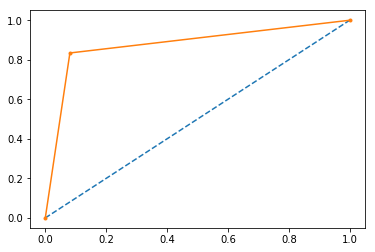

In [86]:
# Plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

# Show the plot
plt.show()

### 2. Logistic Regression

In [23]:
#Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

#Create a Logistic Regression Classifier
logmodel = LogisticRegression()

#Train the model using the training sets, y_pred2=logmodel.predict(X_test)
logmodel.fit(X_train,y_train)

y_pred2 = logmodel.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test,y_pred2))

             precision    recall  f1-score   support

          0       0.71      0.69      0.70      3031
          1       0.54      0.56      0.55      1957

avg / total       0.64      0.64      0.64      4988



In [95]:
#Auc Value
auc = metrics.roc_auc_score(y_test, y_pred2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred2)
print("Auc:",auc)

Auc: 0.6223428422397954


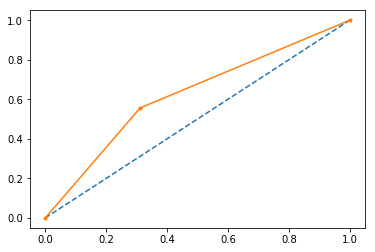

In [88]:
# Plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# Show the plot
plt.show()

### 3. KNN

In [52]:
#Import KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 10)

#Train the model using the training sets, y_pred3=knn.predict(X_test)
knn.fit(X_train,y_train)

y_pred3=knn.predict(X_test)

In [53]:
# Model Accuracy, how often is the classifier correct?
knn.score(X_test, y_test)

0.7796712109061749

In [94]:
# Auc value
auc = metrics.roc_auc_score(y_test, y_pred3)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred3)
print("Auc:",auc)

Auc: 0.7547917811299927


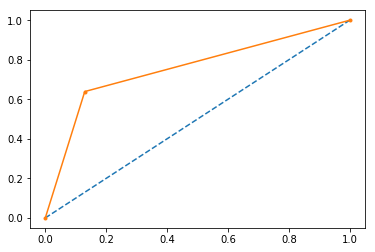

In [90]:
# Plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
# Show the plot
plt.show()

Dari ketiga model diatas, model Random Forest memiliki nilai akurasi dan AUC (Area Under Curva) yang paling besar dibanding model yang lain. Oleh karena itu, dipilih model Random Forest untuk melakukan prediksi apakah pelanggan kartu kredit berisiko terlambat bayar pada bulan Mei pada data testing.

## Load Testing Dataset

In [97]:
# Import data yang akan diprediksi apakah pelanggan akan terlambat bayar atau tidak
datatest=pd.read_csv('testing.csv',delimiter=';')

In [99]:
# Mengubah tipe isi kolom dengan tipe kategorikal menjadi string
datatest[categ]=datatest[categ].astype('str')

# Membuat dummies variabel dari tiap kolom 
data_test=pd.get_dummies(datatest.drop('ID',axis=1),drop_first=True)

In [101]:
# Membuat prediksi apakah pelanggan akan terlambat bayar atau tidak berdasarkan model random forests yang telah dibuat
y_predict=clf.predict(data_test)

In [102]:
# Memasukkan nilai prediksi ke kolom baru
datatest['Prediction']=y_predict

In [103]:
# Mengecek tabel hasil prediksi
datatest.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,Prediction
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


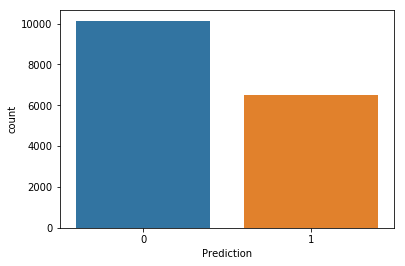

In [104]:
# Menghitung banyaknya pelanggan yang terlambat bayar dan tidak terlambat bayar hasil prediksi model
sns.countplot(datatest['Prediction'])